In [1]:
import numpy as np
import pandas as pd

In [2]:
import chardet

with open('spam.csv', 'rb') as f:
    result = chardet.detect(f.read())

df = pd.read_csv('spam.csv', encoding=result['encoding'])

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2053,ham,Oh... I was thkin of goin yogasana at 10 den n...,NaN,NaN,NaN
1241,ham,"I want to show you the world, princess :) how ...",NaN,NaN,NaN
5560,ham,Anything lor. Juz both of us lor.,NaN,NaN,NaN
4321,ham,Sorry . I will be able to get to you. See you ...,NaN,NaN,NaN
5055,ham,Goodnight da thangam I really miss u dear.,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


## Data Cleaning

In [6]:
# Drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.sample(5)

,v1,v2
1870,ham,"Aight, I'll text you when I'm back"
3725,ham,No chikku nt yet.. Ya i'm free
2713,ham,Nope i'm not drivin... I neva develop da photo...
3765,ham,Yes.mum lookin strong:)
3556,ham,I had it already..sabarish asked me to go..


In [8]:
#renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [9]:
df.sample(5)

,target,text
102,ham,As per your request 'Melle Melle (Oru Minnamin...
701,ham,"Sorry, I'll call later"
4179,ham,"swhrt how u dey,hope ur ok, tot about u 2day.l..."
5124,ham,He is impossible to argue with and he always t...
2871,ham,See you there!


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [11]:
df['target']=encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
df.duplicated().sum()

403

In [15]:
#remove duplicate values
df=df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

## EDA(Exploratory Data Analysis)

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

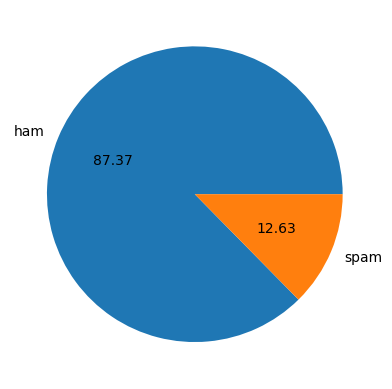

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [21]:
#Data is imbalanced

In [22]:
!pip install nltk


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
import nltk

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nihar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
df['num_characters']=df['text'].apply(len)

In [26]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
#num of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [28]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [29]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [30]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
#ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
#spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [34]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

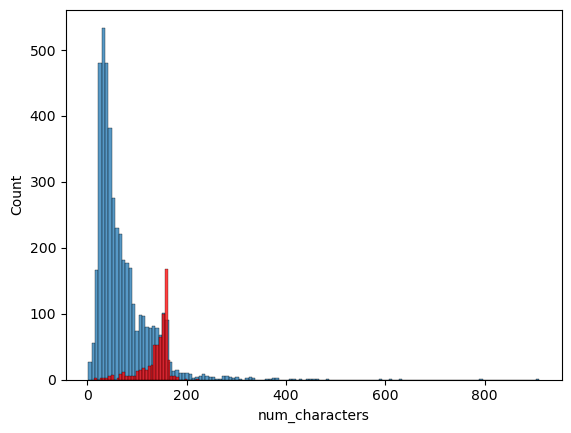

In [35]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

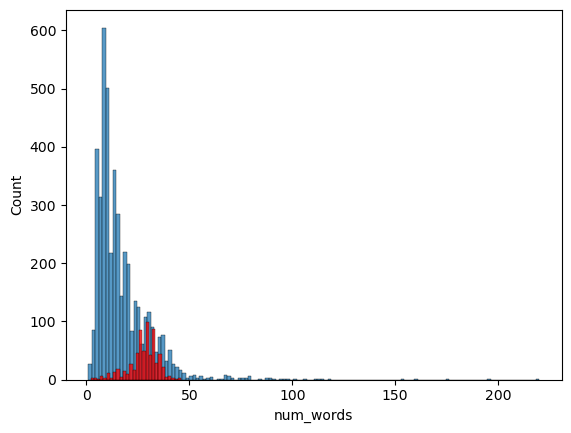

In [36]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

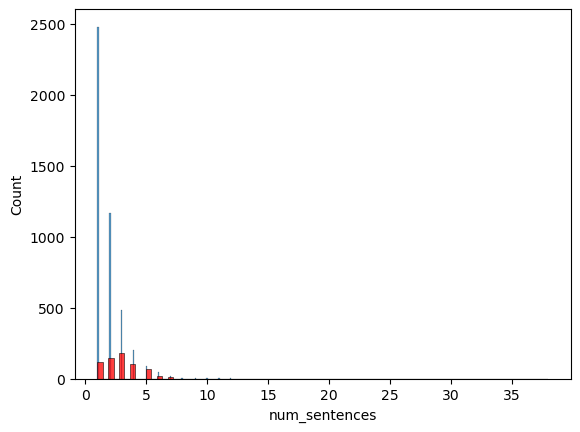

In [37]:
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'],color='red')

C:\Users\nihar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


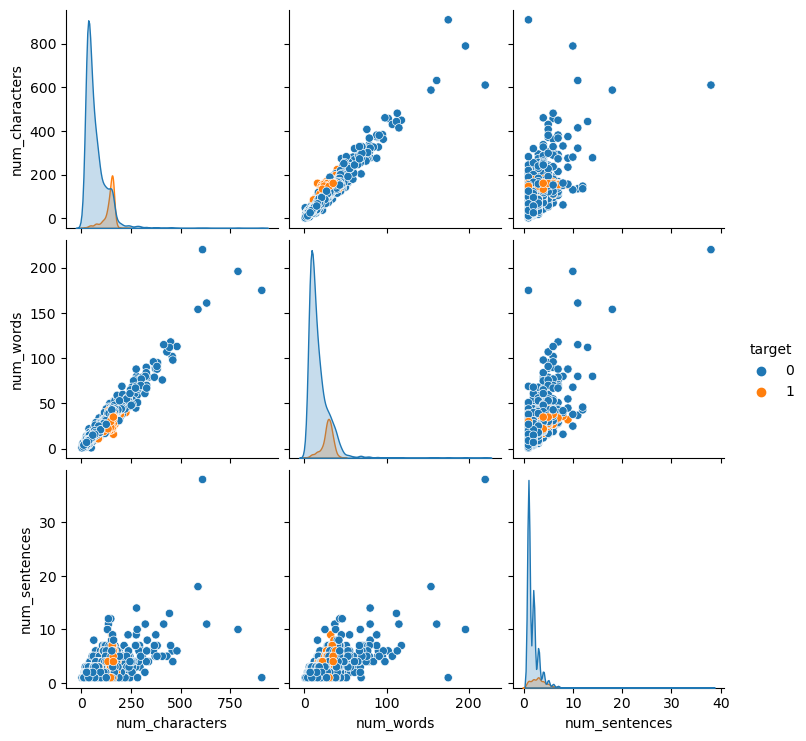

In [38]:
sns.pairplot(df,hue='target')

<Axes: >

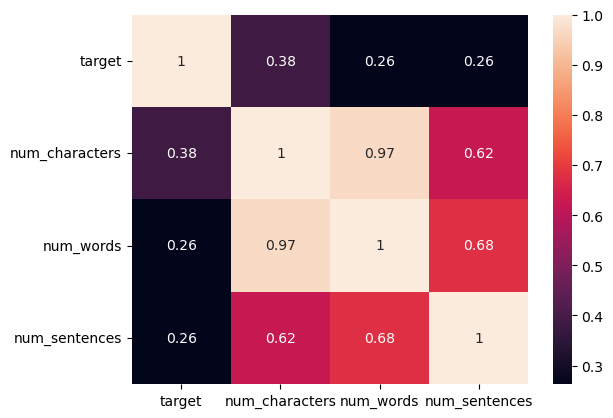

In [39]:
sns.heatmap(df[['target','num_characters','num_words','num_sentences']].corr(),annot=True)

# Data Preprocessing

In [40]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nihar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [41]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [42]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [43]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
               y.append(i)
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [44]:
df['transformed_text']=df['text'].apply(transform_text)

In [45]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [46]:
import sys
print(sys.executable)

C:\Users\nihar\anaconda3\python.exe


In [47]:
!C:\Users\nihar\anaconda3\python.exe -m pip install wordcloud

In [48]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [49]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

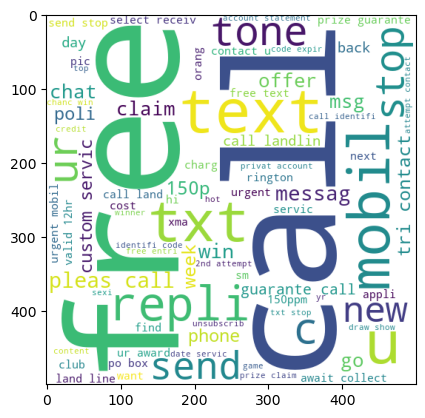

In [50]:
plt.imshow(spam_wc)

In [51]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

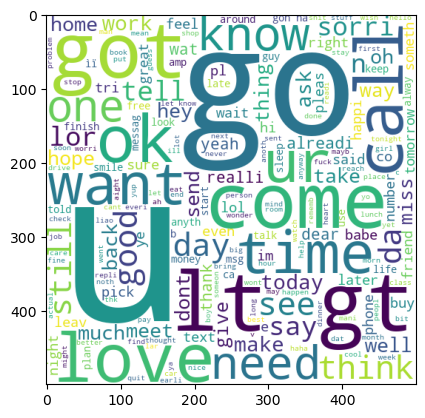

In [52]:
plt.imshow(ham_wc)

In [53]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [54]:
len(spam_corpus)

9939

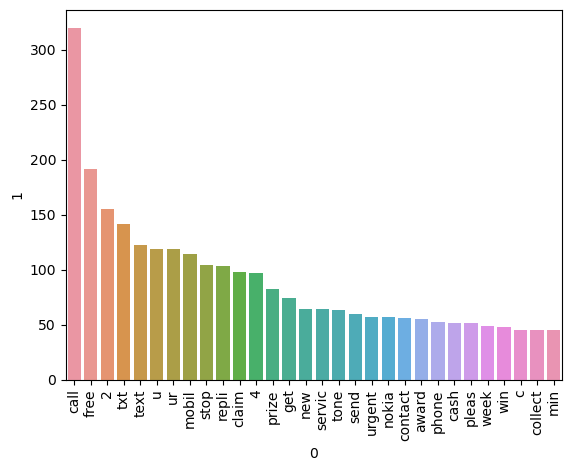

In [55]:
from collections import Counter
sns.barplot(x=(pd.DataFrame(Counter(spam_corpus).most_common(30)))[0],y=(pd.DataFrame(Counter(spam_corpus).most_common(30)))[1])
plt.xticks(rotation='vertical')
plt.show()

In [56]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [57]:
len(ham_corpus)

35404

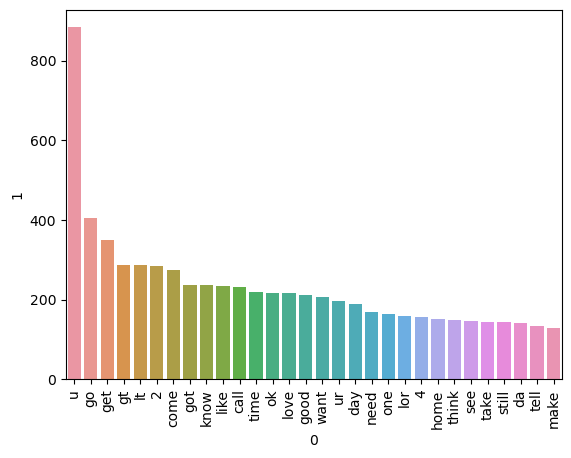

In [58]:
from collections import Counter
sns.barplot(x=(pd.DataFrame(Counter(ham_corpus).most_common(30)))[0],y=(pd.DataFrame(Counter(ham_corpus).most_common(30)))[1])
plt.xticks(rotation='vertical')
plt.show()

# Model Building

In [58]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [59]:
#x=cv.fit_transform(df['transformed_text']).toarray()
x=tfidf.fit_transform(df['transformed_text']).toarray()

In [60]:
x.shape

(5169, 6708)

In [61]:
y=df['target'].values

In [62]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [65]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [79]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [121]:
gnb.fit(X_train,Y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(Y_test,y_pred1))
print(confusion_matrix(Y_test,y_pred1))
print(precision_score(Y_test,y_pred1))

0.8771760154738878
[[790 113]
 [ 14 117]]
0.508695652173913


In [80]:
mnb.fit(X_train,Y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(Y_test,y_pred2))
print(confusion_matrix(Y_test,y_pred2))
print(precision_score(Y_test,y_pred2))

0.9671179883945842
[[903   0]
 [ 34  97]]
1.0


In [81]:
bnb.fit(X_train,Y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(Y_test,y_pred3))
print(confusion_matrix(Y_test,y_pred3))
print(precision_score(Y_test,y_pred3))

0.97678916827853
[[901   2]
 [ 22 109]]
0.9819819819819819


In [124]:
# tfidf--> mnb

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [67]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [68]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [75]:
rfc.fit(X_train,Y_train)
y_pred4=rfc.predict(X_test)
print(accuracy_score(Y_test,y_pred4))
print(confusion_matrix(Y_test,y_pred4))
print(precision_score(Y_test,y_pred4))

0.9816247582205029
[[903   0]
 [ 19 112]]
1.0


In [69]:

def train_classifier(clf,X_train,Y_train,X_test,Y_test):
    clf.fit(X_train,Y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(Y_test,y_pred)
    precision = precision_score(Y_test,y_pred)
    
    return accuracy,precision

In [129]:

train_classifier(svc,X_train,Y_train,X_test,Y_test)

(0.9845261121856866, 0.9831932773109243)

In [130]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,Y_train,X_test,Y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9845261121856866
Precision -  0.9831932773109243
For  KN
Accuracy -  0.9013539651837524
Precision -  1.0
For  NB
Accuracy -  0.9671179883945842
Precision -  1.0
For  DT
Accuracy -  0.9332688588007737
Precision -  0.7767857142857143
For  LR
Accuracy -  0.9564796905222437
Precision -  0.93
For  RF
Accuracy -  0.9816247582205029
Precision -  1.0
For  AdaBoost
Accuracy -  0.965183752417795
Precision -  0.9203539823008849
For  BgC
Accuracy -  0.965183752417795
Precision -  0.88
For  ETC
Accuracy -  0.9806576402321083
Precision -  0.9826086956521739
For  GBDT
Accuracy -  0.9545454545454546
Precision -  0.9375
For  xgb
Accuracy -  0.9680851063829787
Precision -  0.9298245614035088


In [131]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [132]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.901354,1.000000
2,NB,0.967118,1.000000
5,RF,0.981625,1.000000
0,SVC,0.984526,0.983193
8,ETC,0.980658,0.982609
9,GBDT,0.954545,0.937500
4,LR,0.956480,0.930000
10,xgb,0.968085,0.929825
6,AdaBoost,0.965184,0.920354
7,BgC,0.965184,0.880000


In [133]:

performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [134]:

performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.901354
1,NB,Accuracy,0.967118
2,RF,Accuracy,0.981625
3,SVC,Accuracy,0.984526
4,ETC,Accuracy,0.980658
5,GBDT,Accuracy,0.954545
6,LR,Accuracy,0.956480
7,xgb,Accuracy,0.968085
8,AdaBoost,Accuracy,0.965184
9,BgC,Accuracy,0.965184


C:\Users\nihar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


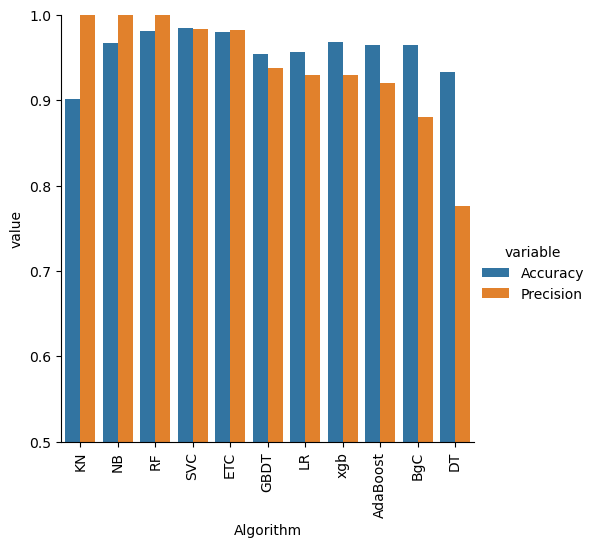

In [135]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [136]:
#Model Improvement

In [70]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [71]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc),('rf',rfc)],voting='soft')

In [72]:
voting.fit(X_train,Y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2)),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2))],
                 voting='soft')

In [73]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(Y_test,y_pred))
print("Precision",precision_score(Y_test,y_pred))

Accuracy 0.9874274661508704
Precision 1.0


In [141]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [142]:
from sklearn.ensemble import StackingClassifier

In [143]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [144]:
clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(Y_test,y_pred))
print("Precision",precision_score(Y_test,y_pred))

Accuracy 0.9893617021276596
Precision 0.9761904761904762


In [76]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(voting,open('model.pkl','wb'))
pickle.dump(rfc,open('model1.pkl','wb'))

In [82]:
pickle.dump(mnb,open('model2.pkl','wb'))